<a href="https://colab.research.google.com/github/alouwyck/vives_ttk_tallinn/blob/main/intro_dl/Intro_to_Deep_Learning_demo_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

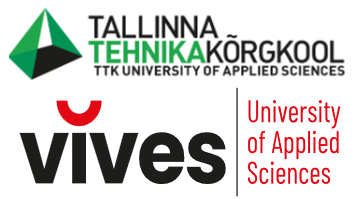<br>

**Erasmus+ Teaching Exchange**<br>
**TTK University of Applied Sciences, Tallinn, Estonia**<br>
8 - 12 December 2025<br><br>
**Guest Lecture at Centre for Sciences**<br>
by Andy Louwyck<br>
VIVES University of Applied Sciences, Kortrijk, Belgium

---



---



# **INTRODUCTION TO DEEP LEARNING WITH PYTHON**

## **Python Libraries**

In [ ]:
import numpy as np  # numeric python
import matplotlib.pyplot as plt  # python library for visualizations
from tensorflow import keras  # keras is TensorFlow's high-level API

## **Our First Neural Network**

###MNIST dataset

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(f"The training set constains {len(train_images)} images")
print(f"The test set contains {len(test_images)} images")

In [ ]:
digit = train_images[4]  # 5th image (index 4!)
plt.imshow(digit, cmap=plt.cm.binary)  # plot image
plt.title(f"Label: {train_labels[4]}");  # label for 5th image

In [ ]:
type(digit)

In [ ]:
digit.shape

In [ ]:
digit.dtype

In [ ]:
digit.min(), digit.max()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # reshape
train_images = train_images.astype("float32") / 255  # normalize and convert to float
test_images = test_images.reshape((10000, 28 * 28))  # reshape
test_images = test_images.astype("float32") / 255  # normalize and convert to float

### Dense neural network

In [ ]:
model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),  # hidden layer consisting of 512 neurons and relu as activation
 keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28 * 28))  # number of neurons for the input layer
model.summary()

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function that calculates difference between predicted and true labels
    optimizer="rmsprop",  # algorithm that minimizes the loss function
    metrics=["accuracy"]  # calculate accuracy after each iteration (epoch)
  )

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);  # training the model using the training set

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # evaluate model using the test set
print(f"accuracy on the test set: {test_acc}")

In [ ]:
digit = test_images[666]  # test image with index 666

probs = model.predict(digit.reshape(1, -1))  # predict returns 10 probabilities
probs[0]

In [ ]:
prob = np.max(probs) * 100  # largest probability
n = np.argmax(probs)  # index (= digit) corresponding to the largest probability
print(f"The neural network is for {prob:.2f} % sure the digit is {n}!")

In [ ]:
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)  # plot test image
plt.title(f"Label: {test_labels[666]}");  # label of the test image

### Convolutional neural network

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28, 28, 1))  # input consists of images of 28 x 28 pixels en 1 color channel
model.summary()

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function
    optimizer="rmsprop",  # optimizer
    metrics=["accuracy"]  # accuracy as metric
  )

In [ ]:
# adding singleton channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64);

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"accuracy on the test set: {test_acc}")

In [ ]:
digit = test_images[666]  # test image with index 666
probs = model.predict(digit[np.newaxis, :, :])  # add extra dimension!
prob = np.max(probs) * 100
n = np.argmax(probs)
print(f"The convnet is for {prob:.2f} % sure that the digit is {n}!")

## **Tensors and Tensor Operations**

### Tensors

In [ ]:
# vector (1D)
a = np.array([1, 2, 3])
print(a)
print(type(a))

In [ ]:
print("ndim:", a.ndim)
print("shape:", a.shape)
print("size:", a.size)
print("dtype:", a.dtype)

In [ ]:
# matrix (2D)
M = np.array([[1, 2, 3],   # row 1
              [4, 5, 6]],  # row 2
             dtype=float)  # dtype
print(M)

In [ ]:
print("ndim:", M.ndim)
print("shape:", M.shape)
print("size:", M.size)
print("dtype:", M.dtype)

In [ ]:
# scalar (0D)
s = np.array(np.pi)
print("scalar s:", s)
print("ndim:", s.ndim)
print("shape:", s.shape)
print("size:", s.size)
print("dtype:", s.dtype)

In [ ]:
# tensor (ND)
N = np.array([
              # first matrix
              [[1, 2, 3],   # row 1
               [4, 5, 6]],  # row 2
              # second matrix
              [[7, 8, 9],   # row 1
               [0, 0, 0]]   # row 2
              ])
print(N)

In [ ]:
print("ndim:", N.ndim)
print("shape:", N.shape)
print("size:", N.size)
print("dtype:", N.dtype)

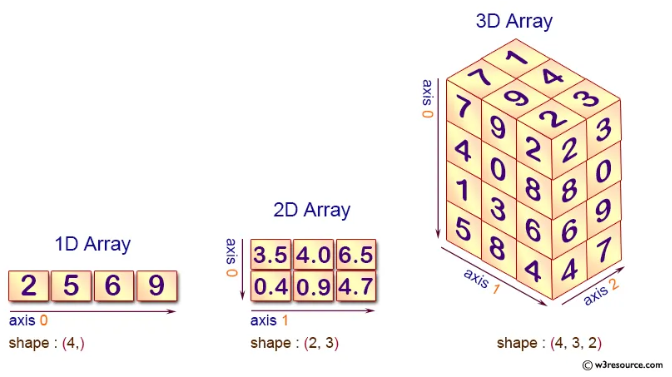

In [ ]:
# special arrays
Z = np.zeros((2, 2, 3))     # all zeros
O = np.ones((4, 5))         # all ones
I = np.eye(3)               # identity matrix
D = np.diag([1, 3, 5])      # diagonal matrix
R = np.random.rand(3, 4)    # random matrix

for a in [Z, O, I, D, R]:
    print(a)
    print()

In [ ]:
# selecting element
R[0][1]  # first row, second column

In [ ]:
R[0, 1]

In [ ]:
# slicing
R[-1, :]  # last row

In [ ]:
R[:, 0]  # first column

In [ ]:
R[1:, 1:-1]  # all rows except for the first, and all columns except for the first and the last

### Tensor operations

In [ ]:
# vectorized expressions

from time import time  # we need this to time the calculations

# a very large matrix containing one million elements equal to 1
X = np.ones((1000, 1000))

# now we want to multiply each element by 2
start = time()
for irow in range(X.shape[0]):
    for icol in range(X.shape[1]):
        X[irow, icol] *= 2
dt_loop = time() - start
print('loop:', dt_loop, 'sec')

# the vectorized expression without loop
X = np.ones((1000, 1000))
start = time()
X *= 2
dt_vect = time() - start
print('vectorized:', dt_vect, 'sec')

# compare both execution times
print(f'vectorized expressoin is {dt_loop / dt_vect:.1f} times faster!')

In [ ]:
# elementary arithmetic operations
n = 3
A = 10 * np.ones((n, n))      # 3x3 matrix with constant elements equal to 10
B = 2 * np.random.rand(n, n)  # 3x3 matrix with numbers between 0 and 2
C = 5 * np.eye(n)             # 3x3 diagonal matrix with nonzero element equal to 5

print(A)
print("\n+\n")
print(B)
print("\n+\n")
print(C)
print("\n=\n")
print(A + B + C)

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[10, 10, 10],
              [20, 20, 20]])
print(A)
print('\n*\n')
print(B)
print('\n=\n')
print(A * B)  # element-by-element multiplication

In [ ]:
# matrix multiplication
np.dot(A, B.T)

In [ ]:
np.dot(A.T, B)

In [ ]:
# mathematical functions
v = np.array([10, 100, 1000, 10_000, 100_000])
np.log10(v)

In [ ]:
x = np.pi / 4 * np.arange(7)  # numpy equivalent of range
np.sin(x)

In [ ]:
# reshaping arrays
A = np.array([range(4), range(4), range(4)])  # 3x4 matrix
A.flatten()  # flatten the array to 1D vector

In [ ]:
A.reshape((2, 6))  # reshape to 2x6 matrix

In [ ]:
v = np.arange(1, 6)  # 1D vector
print(v)
print()
c = v[:, np.newaxis]  # add extra dimension
print(c)
print()
print(c.squeeze())  # squeeze c = omit singleton dimensions

In [ ]:
# broadcasting
A = np.array([np.zeros(3),
              10 * np.ones(3),
              20 * np.ones(3),
              30 * np.ones(3)])  # 4x3 matrix
b = np.arange(1, 4)  # 3 element vector
print(A)
print('\n+\n')
print(b)
print('\n=\n')
print(A + b)  # outcome is also 4x3

In [ ]:
np.tile(b, (4, 1))  # 4x 'repeating' vector b along the row axis

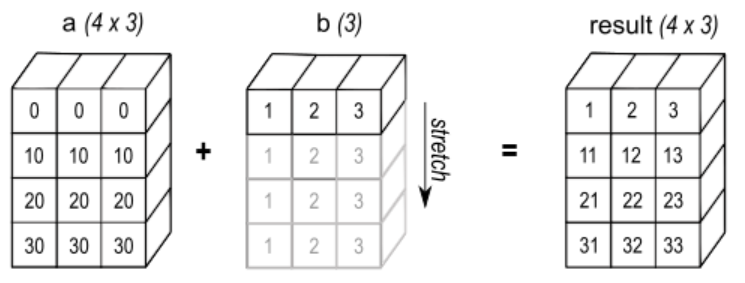

In [ ]:
# shapes must be compatible!
A = np.ones((3, 2))  # 3x2 matrix
b = np.ones(4)  # 4 element vector
try:
    print(A + b)
except ValueError as error:
    print(error)

## **Gradient-Based Optimization**

### Simple linear regression

| Time (hours) | Energy Usage (kWh) |
|--------------|-------------------|
| 1            | 0.55              |
| 2            | 1.03              |
| 3            | 1.41              |
| 4            | 2.03              |
| 5            | 2.51              |
| 6            | 2.92              |
| 7            | 3.62              |
| 8            | 4.05              |
| 9            | 4.49              |
| 10           | 5.12              |


In [ ]:
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
E = np.array([0.55, 1.03, 1.41, 2.03, 2.51, 2.92, 3.62, 4.05, 4.49, 5.12])

plt.scatter(t, E);
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');

Model to predict:

> $\hat{E} = P \cdot t$

Initial guess: $P=0.5$

In [ ]:
P_guess = 0.5
E_guess = P_guess * t

plt.scatter(t, E, label='data');
plt.plot(t, E_guess, 'k:', label='initial guess');
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');
plt.legend();

Residuals or errors:

> $\epsilon_i = E_i - \hat{E}_i = E_i - P \cdot t_i$


Loss function = sum of squared errors:

> $L = \sum_i \epsilon_i^2$


Minimizing the loss function analytically:

> $\dfrac{\delta L}{\delta P}$

> $= \sum_i 2 \epsilon_i \cdot -t_i$

> $= 2 \sum_i (E_i - Pt_i)\cdot -t_i$

> $= 2 P \sum_i t_i^2 - 2 \sum_i E_i t_i$

> $= 0$

Solving this equation for $P$:

> $P = \dfrac{\sum_i E_i t_i}{\sum_i t_i^2}$

In [ ]:
P_optimal = np.sum(E * t) / np.sum(t ** 2)
print('The optimal value for P is', P_optimal)

In [ ]:
E_pred = P_optimal * t
plt.scatter(t, E, label='data');
plt.plot(t, E_pred, 'r-', label='best fit')
plt.plot(t, E_guess, 'k:', label='initial guess');
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');
plt.legend();

In [ ]:
print('The predicted energy usage after 11 hours is', P_optimal * 11, 'kWh')

### The simplest neural net possible

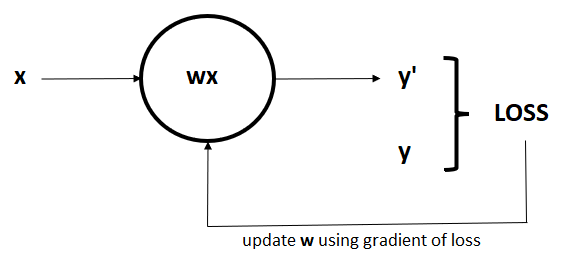

Redefining the loss function $L$ using symbols $x$, $y$, and $w$:

> $L = \sum_i \big(y_i - wx_i \big)^2$

The derivative of the loss function:

> $\dfrac{\delta L}{\delta w} = 2 w \sum_i x_i^2 - 2 \sum_i x_i y_i$


In [ ]:
x, y = t, E  # assign times t and usage E to x and y, resp.
L = lambda w: np.sum((y - w*x)**2)                 # loss function L is sum of squared errors
dLdw = lambda w: 2*w*np.sum(x**2) - 2*np.sum(x*y)  # derivative of L with respect to w

In [ ]:
# verifying dLdw is zero in w_optimal
w_optimal = P_optimal
print(f'Loss function L in w optimal: {L(w_optimal):.4f}')
print(f'Derivative of L in w optimal: {dLdw(w_optimal):.4f}')

In [ ]:
w_range = np.linspace(0, 1, 100)
L_range = np.array([L(w) for w in w_range])

w1, w2, w3 = 0.1, w_optimal, 0.9
L1, L2, L3 = L(w1), L(w2), L(w3)

plt.plot(w_range, L_range, 'k-');
plt.plot([w1, w2, w3], [L1, L2, L3], 'ko');
plt.grid();
plt.xlabel('w');
plt.ylabel('L');

tangent = lambda w, wi, Li: Li + dLdw(wi)*(w-wi)
for wi, Li in zip([w1, w2, w3], [L1, L2, L3]):
    w_tangent = np.array([wi-0.1, wi+0.1])
    plt.plot(w_tangent, tangent(w_tangent, wi, Li), 'r-');

In [ ]:
print(f'derivative in w = {w1} is {dLdw(w1):.4f}')
print(f'derivative in w = {w3} is {dLdw(w3):.4f}')

**Gradient Descent algorithm**:

> $w_{k+1} = w_k - \alpha \dfrac{\delta L}{\delta w}$


In [ ]:
alpha = 0.0001  # learning rate
niter = 100     # number of iterations

w_steps = np.zeros(niter) # array containing all intermediate values of w
w_steps[0] = 0.1          # initial value for w

# gradient descent algorithm
for k in range(niter-1):
    w_steps[k+1] = w_steps[k] - alpha * dLdw(w_steps[k])

print("the optimal value for w found by gradient descent is", w_steps[-1])

In [ ]:
w_range = np.linspace(0, 1, 100)
L_range = np.array([L(w) for w in w_range])
L_steps = np.array([L(w) for w in w_steps])

plt.plot(w_range, L_range);
plt.grid();
plt.xlabel('w');
plt.ylabel('L');
plt.plot(w_steps, L_steps, 'r.');

In [ ]:
# Try it yourself!

alpha = 0.0001  # learning rate
niter = 100     # number of iterations
w_ini = 0.1     # initial value for w

# import statements
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialize figure and coordinate systems
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlabel('w')
ax1.set_ylabel('L')
ax1.set_xlim((-0.1, 1.1))
ax1.set_ylim((-5, 105))
ax2.set_xlabel('t (h)');
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('E (kWh)');
ax2.set_xlim((0, 11))
ax2.set_ylim((0, 6))

# the initialization function for the animation
def init():
    w_range = np.linspace(0, 1, 100)
    L_range = np.array([L(w) for w in w_range])
    ax1.plot(w_range, L_range, 'k-')
    ax1.grid()
    ax2.scatter(t, E);
    ax2.grid()

# the update function for the animation
w_steps = [w_ini]
L_steps = [L(w_steps)]
def update(i):
    if i > 0: ax2.lines[0].remove()
    ax1.plot(w_steps[-1], L_steps[-1], 'r.')
    ax1.set_title(f'w = {w_steps[-1]:.4f}')
    ax2.plot(t, t * w_steps[-1], 'r-')
    ax2.set_title(f'L = {L_steps[-1]:.4f}')
    w_steps.append(w_steps[-1] - alpha * dLdw(w_steps[-1]))  # gradient descent
    L_steps.append(L(w_steps[-1]))  # loss

# create the animation
ani = FuncAnimation(fig, update, frames=range(niter), init_func=init, blit=False, repeat=True)
plt.close()
ani

### Keras

In [ ]:
# building the model
single_node = keras.Sequential()  # layered neural net

single_node.add(
    keras.layers.Dense(  # 1 dense or fully connected layer
        1,               # 1 linear unit (or neuron)
        use_bias=0       # no bias (= no intercept)
    )
)

In [ ]:
# compiling the model
single_node.compile(
    optimizer=keras.optimizers.SGD(learning_rate=alpha),  # stochastic gradient descent with learning rate alpha
    loss='mse'                                            # mean squared error as loss function
)

In [ ]:
# training the model
result = single_node.fit(
    x[:, np.newaxis],   # input feature x
    y[:, np.newaxis],   # target y
    epochs=1000,        # number of iterations
    batch_size=len(x),  # process entire dataset at once
    verbose=0           # no printing
);

In [ ]:
plt.plot(result.history['loss']);
plt.grid();
plt.xlabel("Iteration");
plt.ylabel("Loss");

In [ ]:
w_opt = single_node.get_weights()
print("the optimal value for w found by Keras is", w_opt[0][0].item())

### Stochastic Gradient Descent and Backpropagation

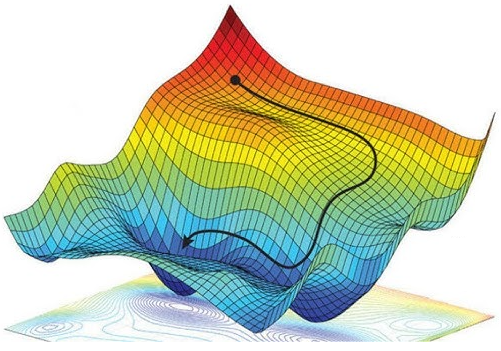